Dentro de este archivo se va a analizar los datos de los csv.

In [34]:
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split  # Agregar esta línea
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

In [3]:
# Cargar los datos
users_items = pd.read_csv("UsersItems.csv")
user_reviews = pd.read_csv("UserReviews.csv")
steam_games = pd.read_csv("SteamGames.csv")


In [7]:
# Mostrar las primeras filas de cada DataFrame
display(HTML("<h3>UsersItems</h3>"))
display(users_items.head().style.set_caption("Primeras filas de UsersItems"))

display(HTML("<h3>UserReviews</h3>"))
display(user_reviews.head().style.set_caption("Primeras filas de UserReviews"))

display(HTML("<h3>SteamGames</h3>"))
display(steam_games.head().style.set_caption("Primeras filas de SteamGames"))


In [9]:
# Función para mostrar información sobre los datos de manera más visual
def display_info(df, name):
    display(HTML(f"<h3>{name}</h3>"))
    display(df.info())

# Mostrar información sobre los datos de manera más visual
display_info(users_items, "UsersItems")
display_info(user_reviews, "UserReviews")
display_info(steam_games, "SteamGames")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178428 entries, 0 to 178427
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           178428 non-null  object
 1   items_count       178428 non-null  int64 
 2   steam_id          178428 non-null  int64 
 3   user_url          178428 non-null  object
 4   item_id           178428 non-null  int64 
 5   item_name         178428 non-null  object
 6   playtime_forever  178428 non-null  int64 
 7   playtime_2weeks   178428 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 10.9+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29638 entries, 0 to 29637
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             29638 non-null  object 
 1   user_url            29638 non-null  object 
 2   funny               3408 non-null   float64
 3   posted              25052 non-null  object 
 4   item_id             29638 non-null  int64  
 5   helpful             29638 non-null  object 
 6   recommend           29638 non-null  bool   
 7   sentiment_analysis  29638 non-null  int64  
dtypes: bool(1), float64(1), int64(2), object(4)
memory usage: 1.6+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32135 entries, 0 to 32134
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     24064 non-null  object 
 1   genres        28852 non-null  object 
 2   app_name      32133 non-null  object 
 3   title         30085 non-null  object 
 4   url           32135 non-null  object 
 5   release_date  29783 non-null  object 
 6   tags          31972 non-null  object 
 7   reviews_url   32133 non-null  object 
 8   specs         31465 non-null  object 
 9   price         32135 non-null  float64
 10  early_access  32135 non-null  bool   
 11  item_id       32135 non-null  int64  
 12  developer     28836 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(10)
memory usage: 3.0+ MB


None

# Developer con mayores ventas

A continuacion se mostrara una grafica con los Developers con mayor numero de ventas a lo largo del tiempo

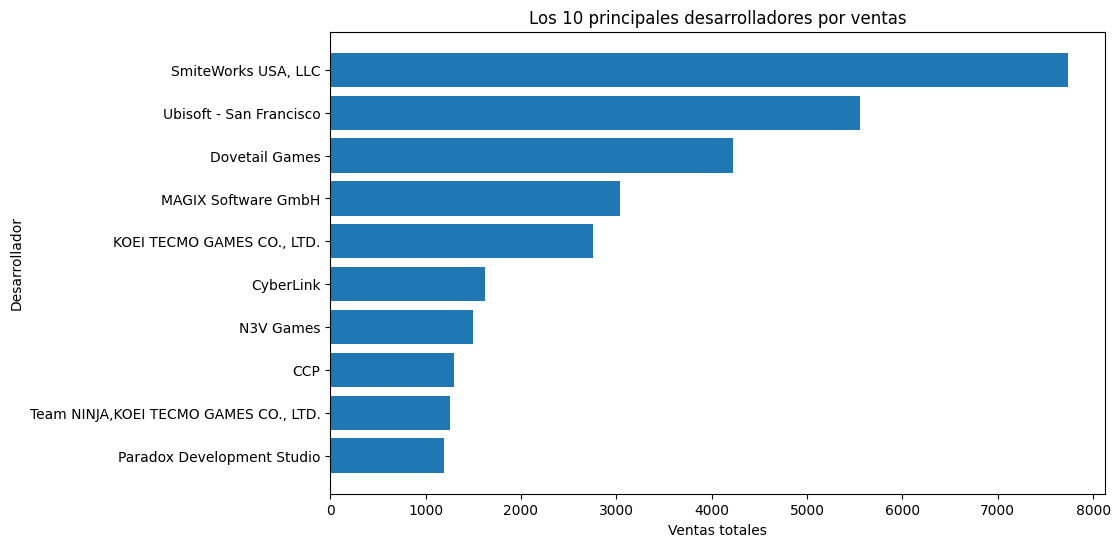

In [11]:
# Agrupar por desarrollador y sumar las ventas
developer_sales = steam_games.groupby('developer')['price'].sum().reset_index()

# Ordenar por ventas en orden descendente
developer_sales = developer_sales.sort_values(by='price', ascending=False)

# Mostrar los 10 principales desarrolladores en términos de ventas
top_developers = developer_sales.head(10)

# Visualización
plt.figure(figsize=(10, 6))
plt.barh(top_developers['developer'], top_developers['price'])
plt.xlabel('Ventas totales')
plt.ylabel('Desarrollador')
plt.title('Los 10 principales desarrolladores por ventas')
plt.gca().invert_yaxis()  # Invertir el eje y para que el desarrollador con más ventas esté en la parte superior
plt.show()

Podemos ver que smiteWorks es el developer con mayor cantidad de ventas, a continuacion veremos una lista de sus juegos 

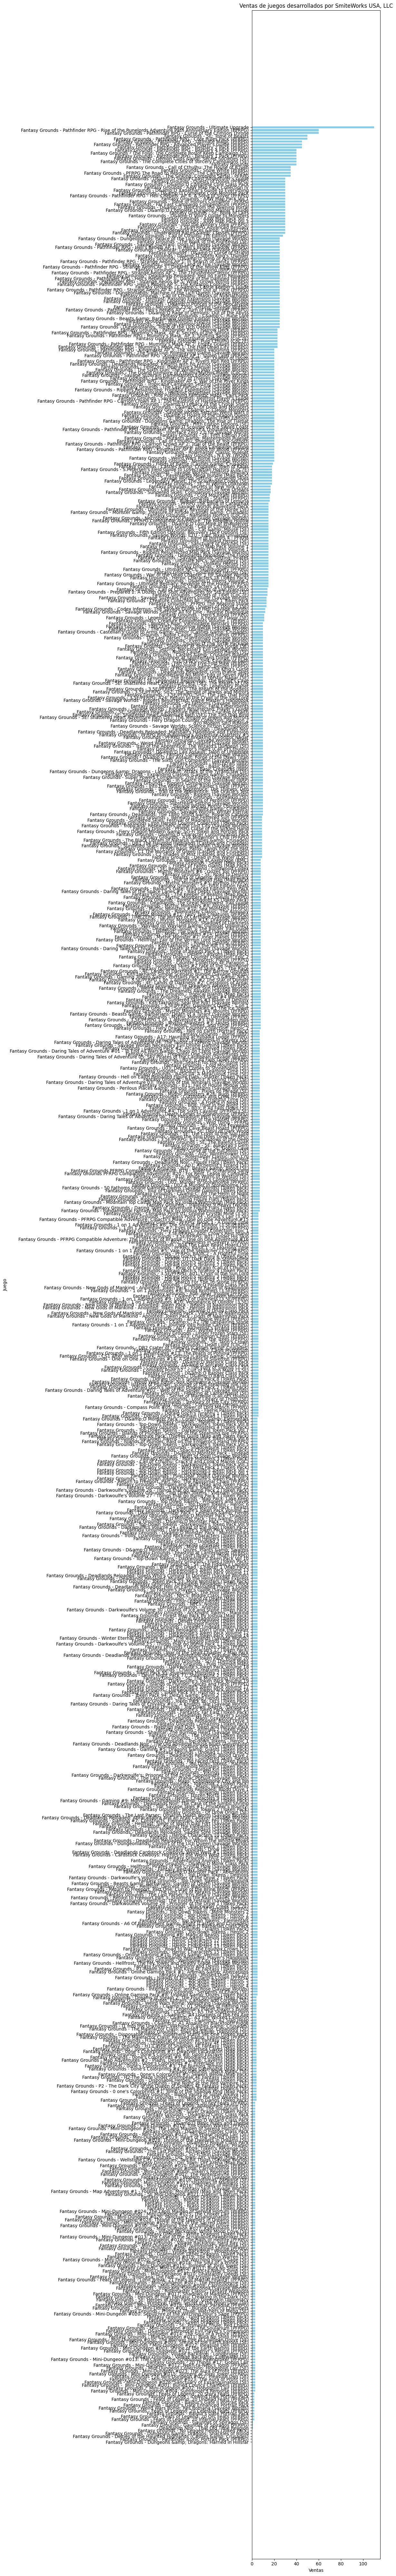

In [17]:
# Filtrar los juegos desarrollados por SmiteWorks USA, LLC
smite_works_games = steam_games[steam_games['developer'] == 'SmiteWorks USA, LLC']
# Filtrar los juegos desarrollados por SmiteWorks USA, LLC
smite_works_games_sorted = smite_works_games.sort_values(by='price', ascending=False)
# Visualización de las ventas de los juegos de SmiteWorks USA, LLC
plt.figure(figsize=(12, 80))
plt.barh(smite_works_games_sorted['title'], smite_works_games_sorted['price'], color='skyblue', height=0.7)
plt.xlabel('Ventas')
plt.ylabel('Juego')
plt.title('Ventas de juegos desarrollados por SmiteWorks USA, LLC')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar el juego con más ventas en la parte superior
plt.tight_layout()  # Ajustar automáticamente los márgenes para evitar recorte de etiquetas
plt.show()

Procederemos a ver las ventas por año de este Developer

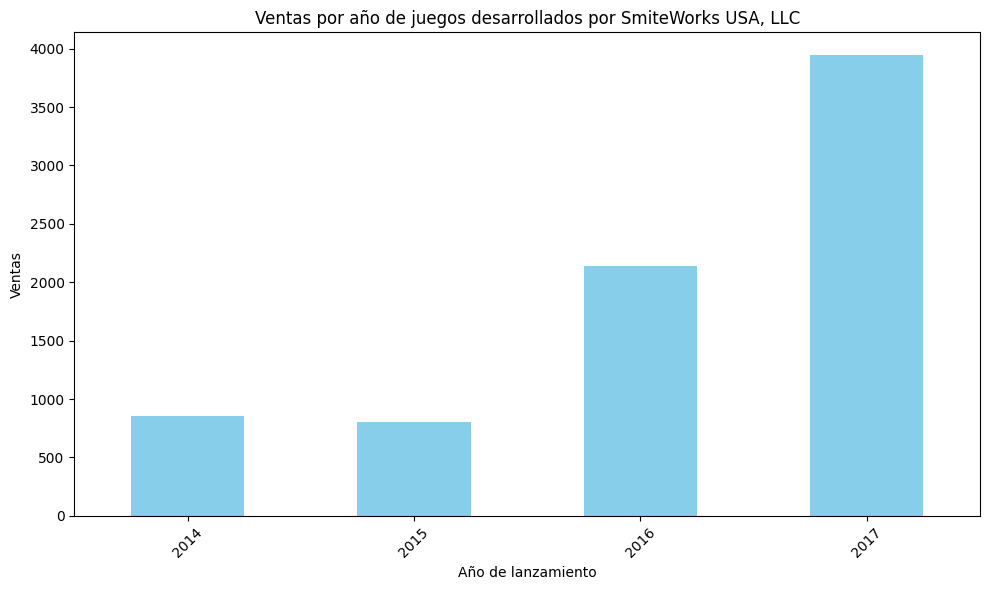

In [19]:
# Copiar el subconjunto de datos para evitar SettingWithCopyWarning
smite_works_games = smite_works_games.copy()

# Convertir la columna 'release_date' a formato de fecha
smite_works_games['release_date'] = pd.to_datetime(smite_works_games['release_date'])

# Extraer el año de la columna 'release_date'
smite_works_games['release_year'] = smite_works_games['release_date'].dt.year

# Agrupar por año y sumar las ventas
sales_by_year = smite_works_games.groupby('release_year')['price'].sum()

# Visualización de las ventas por año
plt.figure(figsize=(10, 6))
sales_by_year.plot(kind='bar', color='skyblue')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas')
plt.title('Ventas por año de juegos desarrollados por SmiteWorks USA, LLC')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejorar la legibilidad
plt.tight_layout()
plt.show()


Podemos ver que el año con su mayor numero de ventas es en el año 2017

# Generos mas populares

a continuacion vamos a ver los generos mas populares a lo largo del tiempo.

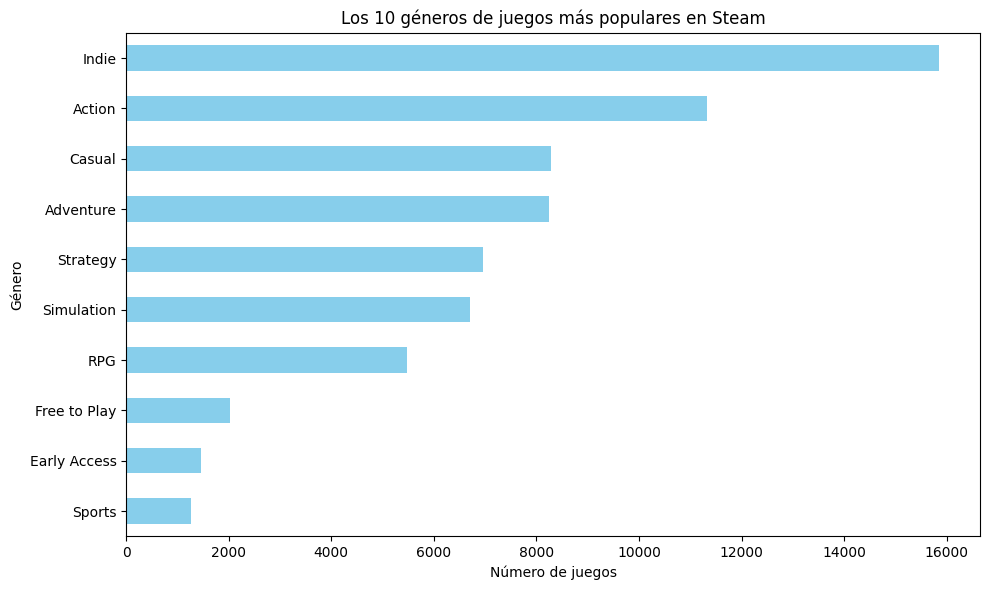

In [21]:
# Conteo de géneros de juegos
genres_count = steam_games['genres'].str.split(',').explode().str.strip().value_counts()

# Convertir la columna 'genres' a listas de géneros
steam_games['genres'] = steam_games['genres'].str.strip("[]").str.replace("'", "").str.split(", ")

# Descomponer las listas de géneros y contar la frecuencia de cada género
genres_count = steam_games['genres'].explode().value_counts()

# Visualización de los géneros de juegos más populares
plt.figure(figsize=(10, 6))
genres_count.head(10).sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Número de juegos')
plt.ylabel('Género')
plt.title('Los 10 géneros de juegos más populares en Steam')
plt.tight_layout()
plt.show()

Podemos ver que el genero mas popular popular de todos es indie, a continuacion vamos a ver cual es el genero menos popular de todos

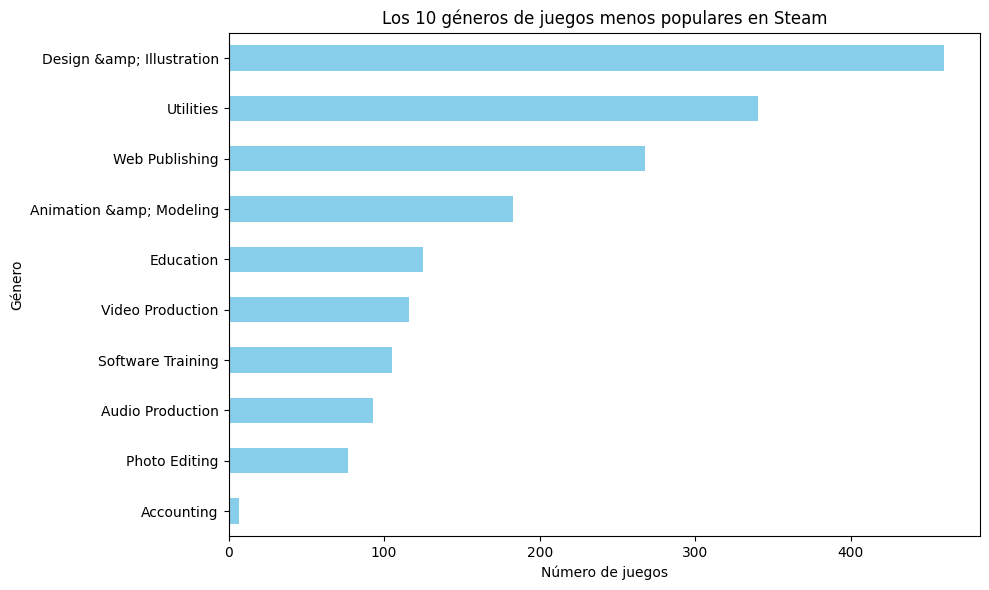

In [25]:
# Descomponer las listas de géneros y contar la frecuencia de cada género
genres_count = steam_games['genres'].explode().value_counts()

# Visualización de los géneros de juegos menos populares
plt.figure(figsize=(10, 6))
genres_count.tail(10).sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Número de juegos')
plt.ylabel('Género')
plt.title('Los 10 géneros de juegos menos populares en Steam')
plt.tight_layout()
plt.show()


El genero menos vendido en steam es Accounting(contabilidad) 

# Análisis de precio de juegos
Se investiga la distribución de los precios de los juegos en la plataforma. ¿Cuál es el rango de precios más común? ¿Hay alguna relación entre el precio de un juego y su popularidad o calificación?

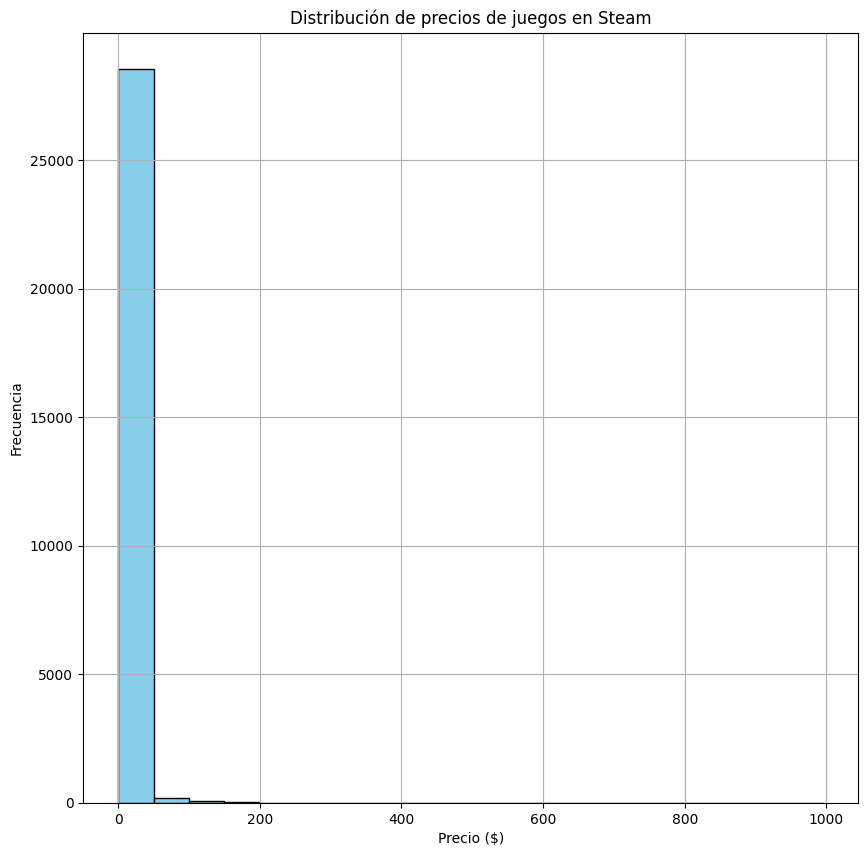

In [44]:
# Eliminar juegos con precio cero
steam_games = steam_games[steam_games['price'] > 0]

# Histograma de precios
plt.figure(figsize=(10, 10))
plt.hist(steam_games['price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de precios de juegos en Steam')
plt.xlabel('Precio ($)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


In [46]:
# Ordenar los juegos por precio de forma descendente
most_expensive_games = steam_games.sort_values(by='price', ascending=False)

# Seleccionar las columnas de interés
most_expensive_games = most_expensive_games[['app_name', 'price']]

# Mostrar los primeros juegos más caros en una tabla
print(most_expensive_games.head(10).to_string(index=False))

                                           app_name  price
    Strata Spaces VR – Professional Edition Upgrade 995.00
                         X-Plane 10 Global - 64 Bit 771.71
                                           HTC Vive 599.00
                             EVE Online: 15400 PLEX 499.99
CUR3D Maker Edition - Permission for commercial use 499.99
                             GameMaker Studio 2 UWP 399.99
                          GameMaker Studio 2 Mobile 399.99
                   MAGIX Video Pro X9 Steam Edition 399.00
                    VEGAS Pro 15 Edit Steam Edition 399.00
                   MAGIX Video Pro X8 Steam Edition 399.00


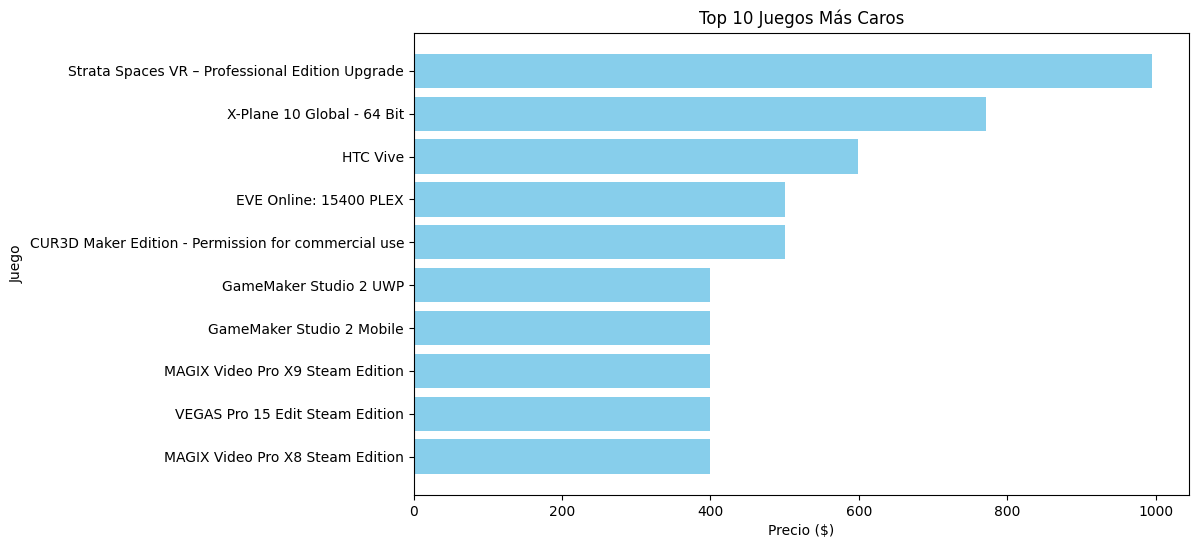

In [47]:
# Obtener los datos de los juegos más caros
top_expensive_games = steam_games.sort_values(by='price', ascending=False).head(10)

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
plt.barh(top_expensive_games['app_name'], top_expensive_games['price'], color='skyblue')
plt.xlabel('Precio ($)')
plt.ylabel('Juego')
plt.title('Top 10 Juegos Más Caros')
plt.gca().invert_yaxis()  # Invertir el eje y para que el juego más caro esté arriba
plt.show()

Podemos ver que el juego mas caro ha sido Strata Spaces VR – Professional Edition Upgrade con un valor de 995.00 dolares

A continuacion vamos a poder ver el precio promedio de los videojuegos

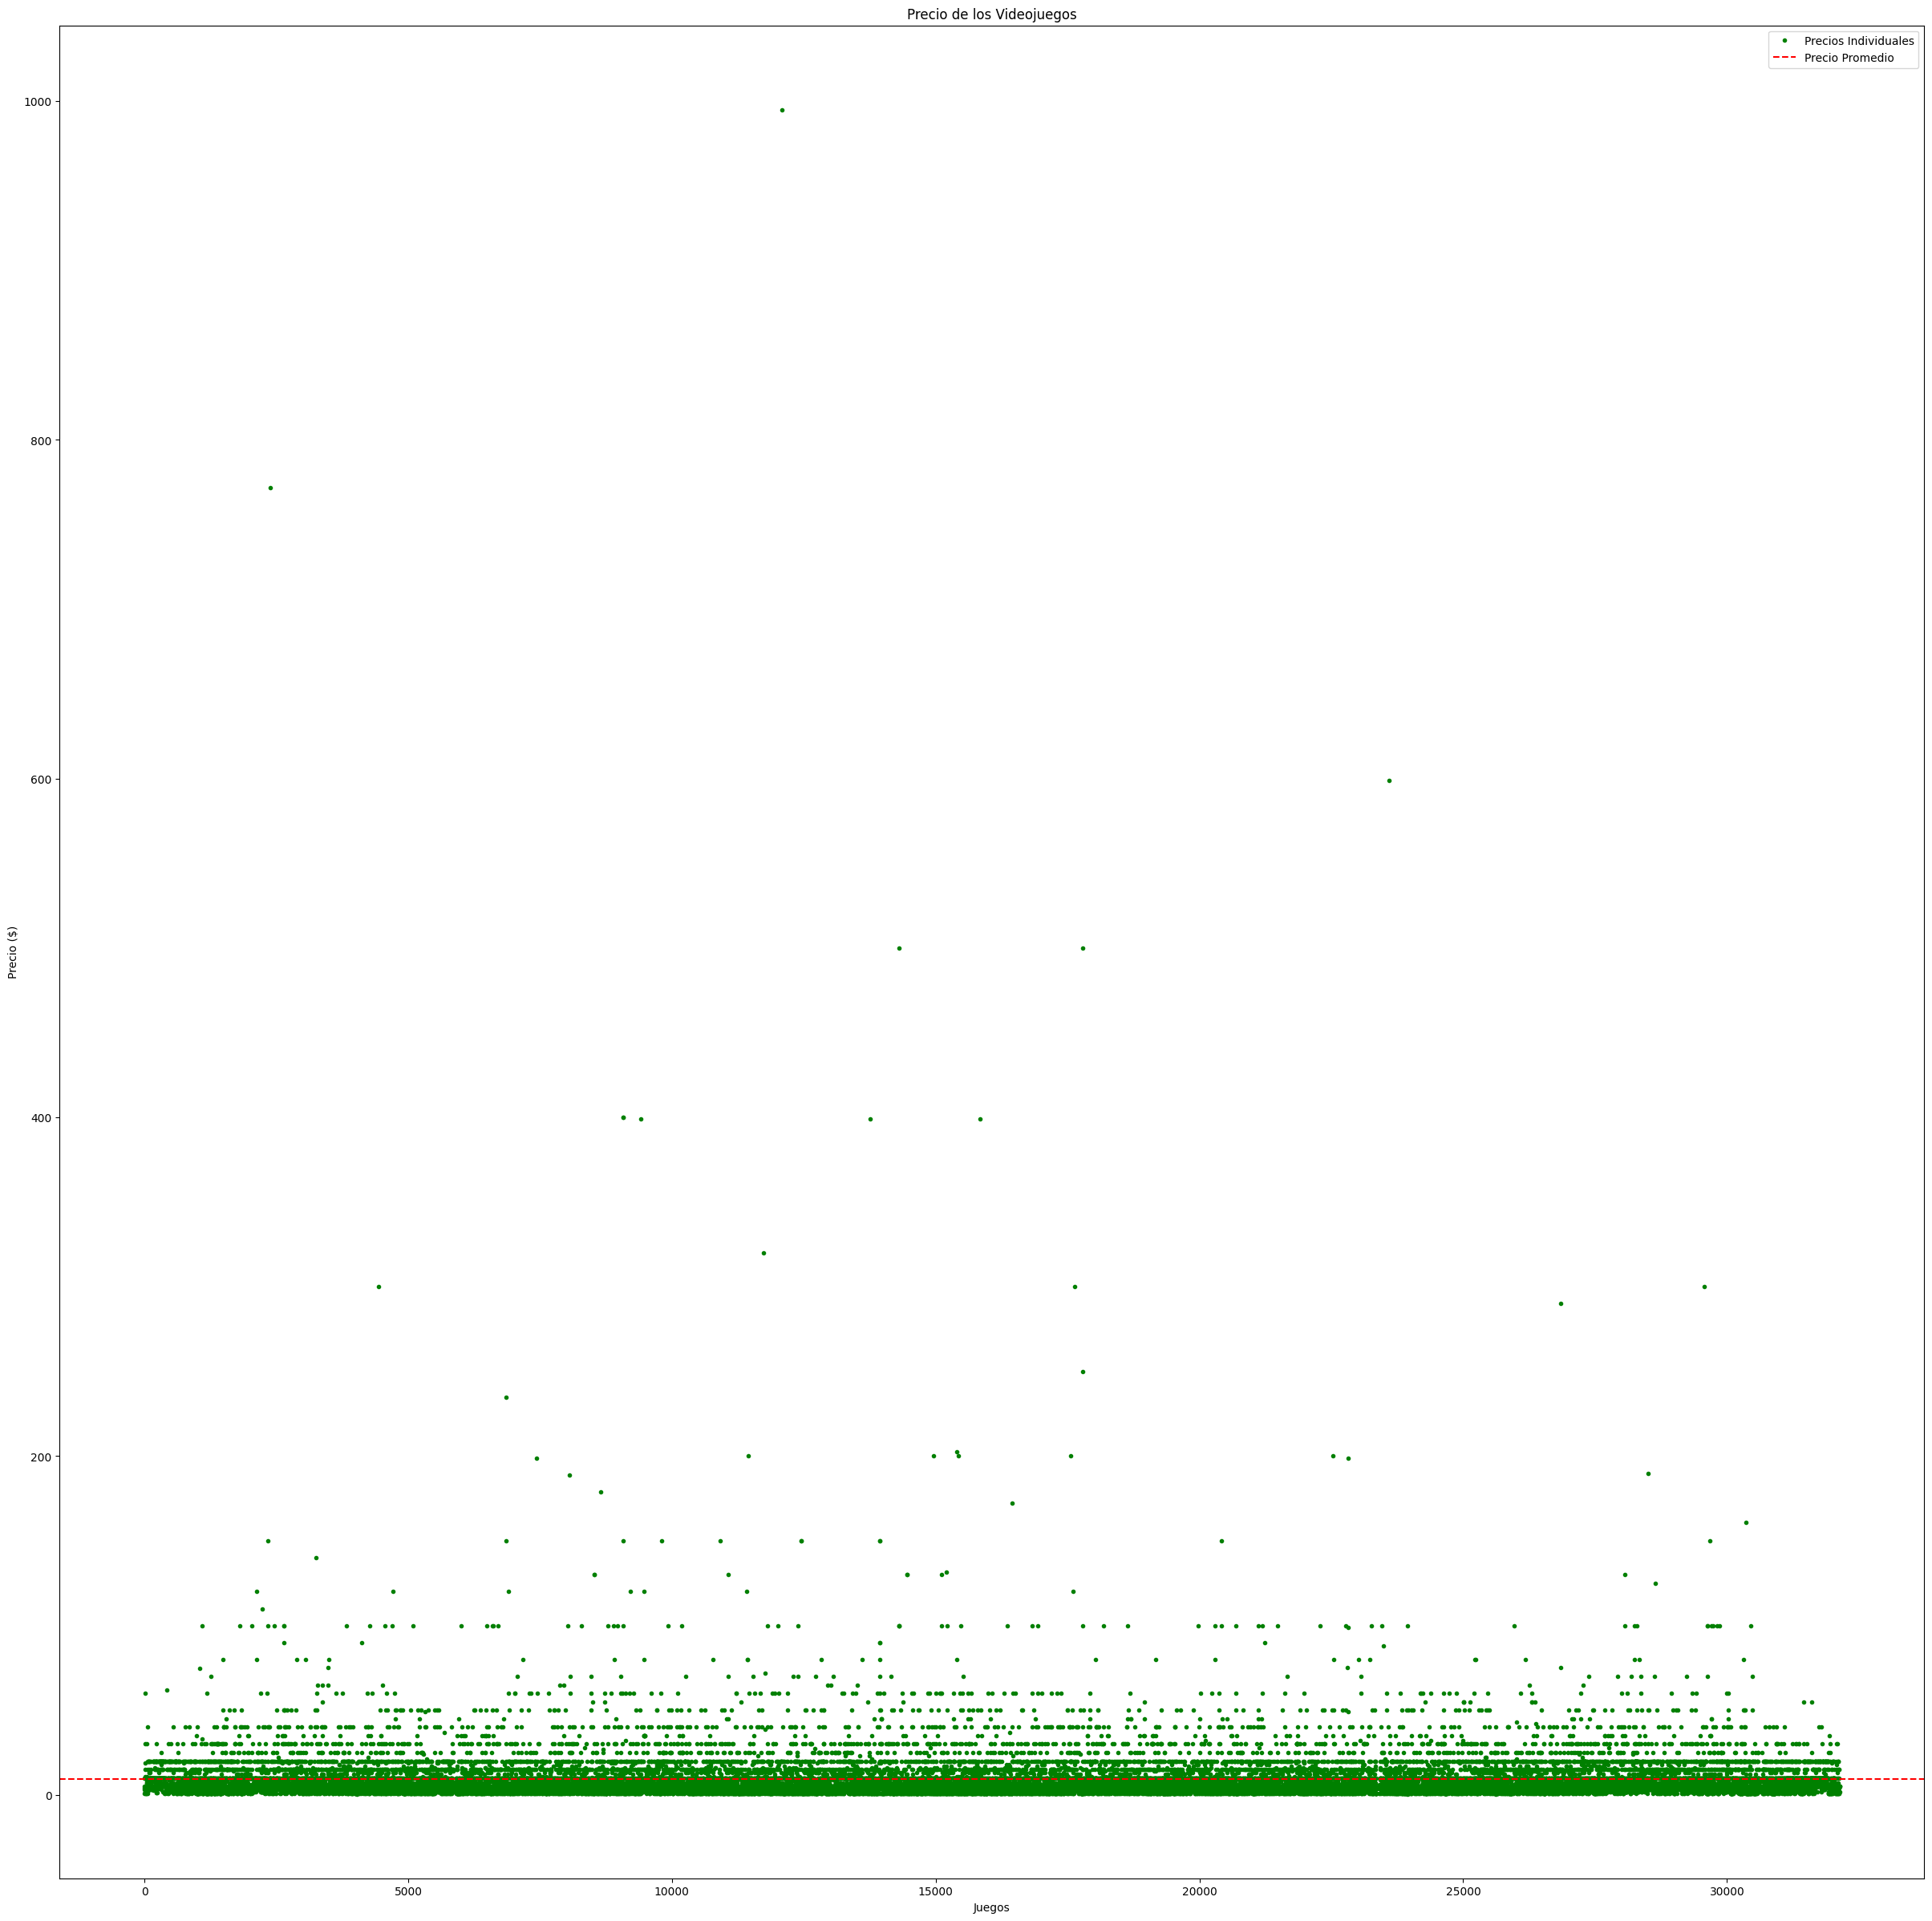

In [53]:
# Calcular el promedio del precio de los videojuegos
average_price = steam_games['price'].mean()

# Crear una gráfica de puntos con el precio de cada juego y el precio promedio
plt.figure(figsize=(30, 30))
plt.plot(steam_games['price'], '.', color='green', label='Precios Individuales')
plt.axhline(y=average_price, color='red', linestyle='--', label='Precio Promedio')
plt.xlabel('Juegos')
plt.ylabel('Precio ($)')
plt.title('Precio de los Videojuegos')
plt.legend()
plt.show()

In [54]:
# Calcular el precio promedio de los videojuegos
average_price = steam_games['price'].mean()

# Imprimir el precio promedio como un número
print(f"Precio promedio de los videojuegos: ${average_price:.2f}")


Precio promedio de los videojuegos: $9.45


Podemos darnos cuenta que el precio promedio de los videojuegos es de 9.45 dolares, teniendo una distribucion no tan alta y rara vez frecuente

# satisfaccion de los usuarios con steam

In [55]:
# Filtrar las revisiones que son recomendadas
positive_reviews = user_reviews[user_reviews['recommend']]

# Calcular el porcentaje de recomendaciones positivas
satisfaction_level = (positive_reviews.shape[0] / user_reviews.shape[0]) * 100

print(f"Nivel de satisfacción de los usuarios de Steam: {satisfaction_level:.2f}%")


Nivel de satisfacción de los usuarios de Steam: 90.63%


## Conclusiones


Podemos ver que dentro del conjunto de datos existen multiples variables a estudiar, las cuales pueden servirle a developers con el fin de encontrar un publico mas ideal a un precio mas ideal.